# 2.3: Classical confidence intervals

In [1]:
from __future__ import print_function, division
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# use matplotlib style sheet
plt.style.use('ggplot')

## CI for continuous data, Pg 18

In [2]:
# import the t-distribution from scipy.stats
from scipy.stats import t

In [3]:
y = np.array([35,34,38,35,37])
y

array([35, 34, 38, 35, 37])

In [4]:
n = len(y)
n

5

In [5]:
estimate = np.mean(y)
estimate

35.799999999999997

Numpy uses a denominator of **N** in the standard deviation calculation by
default, instead of **N-1**. To use **N-1**, the unbiased estimator-- and to
agree with the R output, we have to give `np.std()` the argument `ddof=1`:

In [6]:
se = np.std(y, ddof=1)/np.sqrt(n)
se

0.73484692283495334

In [7]:
int50 = estimate + t.ppf([0.25, 0.75], n-1)*se
int50

array([ 35.25570103,  36.34429897])

In [8]:
int95 = estimate + t.ppf([0.025, 0.975], n-1)*se
int95

array([ 33.75973786,  37.84026214])

## CI for proportions, Pg 18

In [9]:
from scipy.stats import norm

In [10]:
y = 700
y

700

In [11]:
n = 1000
n

1000

In [12]:
estimate = y/n
estimate

0.7

In [13]:
se = np.sqrt(estimate*(1-estimate)/n)
se

0.014491376746189439

In [14]:
int95 = estimate + norm.ppf([.025,0.975])*se
int95

array([ 0.67159742,  0.72840258])

## CI for discrete data, Pg 18

In [15]:
y = np.repeat([0,1,2,3,4], [600,300, 50, 30, 20])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [16]:
n = len(y)
n

1000

In [17]:
estimate = np.mean(y)
estimate

0.56999999999999995

See the note above about the difference different defaults for standard
deviation in Python and R.

In [18]:
se = np.std(y, ddof=1)/np.sqrt(n)
se

0.027674281668470926

In [19]:
int50 = estimate + t.ppf([0.25, 0.75], n-1)*se
int50

array([ 0.55132718,  0.58867282])

In [20]:
int95 = estimate + t.ppf([0.025, 0.975], n-1)*se
int95

array([ 0.51569361,  0.62430639])

## Plot Figure 2.3, Pg 19

The **polls.dat** file has an unusual format. The data that we would like to
have in a single row is split across 4 rows:

* year month
* percentage support
* percentage against
* percentage no opinion

The data seems to be a subset of the Gallup data, available here:
http://www.gallup.com/poll/1606/Death-Penalty.aspx

We can see the unusual layout using the **bash** command *head* (linux/osx only,
sorry..)

In [21]:
%%bash
head ../../ARM_Data/death.polls/polls.dat

2002 10
 70
 25
 05
2002 5
 72
 25
 03
2001 10
 68


Using knowledge of the file layout we can read in the file and pre-process into
appropriate rows/columns for passing into a pandas dataframe:

In [22]:
# Data is available in death.polls directory of ARM_Data
data = []
temp = []
ncols = 5
with open("../../ARM_Data/death.polls/polls.dat") as f:
    for line in f.readlines():
        for d in line.strip().split(' '):
            temp.append(float(d))
        if (len(temp) == ncols):
            data.append(temp)
            temp = []

polls = pd.DataFrame(data, columns=[u'year', u'month', u'perc for', 
                     u'perc against', u'perc no opinion'])
polls.head()

,year,month,perc for,perc against,perc no opinion
0,2002,10,70,25,5
1,2002,5,72,25,3
2,2001,10,68,26,6
3,2001,5,65,27,8
4,2001,2,67,25,8


In [23]:
# --Note: this give the (percent) support for thise that have an opinion
# --The percentage with no opinion are ignored
# --This results in difference between our plot (below) and the Gallup plot (link above)
polls[u'support'] = polls[u'perc for']/(polls[u'perc for']+polls[u'perc against'])
polls.head()

,year,month,perc for,perc against,perc no opinion,support
0,2002,10,70,25,5,0.736842
1,2002,5,72,25,3,0.742268
2,2001,10,68,26,6,0.723404
3,2001,5,65,27,8,0.706522
4,2001,2,67,25,8,0.728261


In [24]:
polls[u'year_float'] = polls[u'year'] + (polls[u'month']-6)/12
polls.head()

,year,month,perc for,perc against,perc no opinion,support,year_float
0,2002,10,70,25,5,0.736842,2002.333333
1,2002,5,72,25,3,0.742268,2001.916667
2,2001,10,68,26,6,0.723404,2001.333333
3,2001,5,65,27,8,0.706522,2000.916667
4,2001,2,67,25,8,0.728261,2000.666667


In [25]:
# add error column -- symmetric so only add one column
# assumes sample size N=1000
# uses +/- 1 standard error, resulting in 68% confidence
polls[u'support_error'] = np.sqrt(polls[u'support']*(1-polls[u'support'])/1000)
polls.head()

,year,month,perc for,perc against,perc no opinion,support,year_float,support_error
0,2002,10,70,25,5,0.736842,2002.333333,0.013925
1,2002,5,72,25,3,0.742268,2001.916667,0.013831
2,2001,10,68,26,6,0.723404,2001.333333,0.014145
3,2001,5,65,27,8,0.706522,2000.916667,0.014400
4,2001,2,67,25,8,0.728261,2000.666667,0.014068


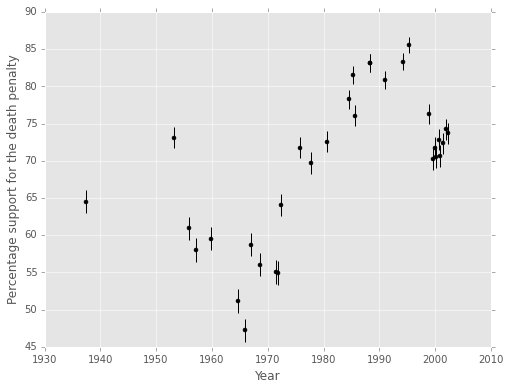

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(polls[u'year_float'], 100*polls[u'support'],
             yerr=100*polls[u'support_error'], fmt='ko',
             ms=4, capsize=0)
plt.ylabel(u'Percentage support for the death penalty')
plt.xlabel(u'Year')

# you can adjust y-limits with command like below
# I will leave the default behavior
#plt.ylim(np.min(100*polls[u'support'])-2, np.max(100*polls[u'support']+2))

## Weighted averages, Pg 19

The example R-code for this part is incomplete, so I will make up *N*, *p* and
*se* loosely related to the text on page 19.

In [27]:
N = np.array([66030000, 81083600, 60788845])
p = np.array([0.55, 0.61, 0.38])
se = np.array([0.02, 0.03, 0.03])

In [28]:
w_avg = np.sum(N*p)/np.sum(N)
w_avg

0.52369397146820473

In [29]:
se_w_avg = np.sqrt(np.sum((N*se/np.sum(N))**2))
se_w_avg

0.015943244310739957

In [30]:
# this uses +/- 2 std devs
int_95 = w_avg + np.array([-2,2])*se_w_avg
int_95

array([ 0.49180748,  0.55558046])

## CI using simulations, Pg 20

In [31]:
# import the normal from scipy.stats
# repeated to make sure that it is clear that it is needed for this section
from scipy.stats import norm

# also need this for estimating CI from samples
from scipy.stats.mstats import mquantiles

In [32]:
n_men = 500
n_men

500

In [33]:
p_hat_men = 0.75
p_hat_men

0.75

In [34]:
se_men = np.sqrt(p_hat_men*(1.-p_hat_men)/n_men)
se_men

0.019364916731037084

In [35]:
n_women = 500
n_women

500

In [36]:
p_hat_women = 0.65
p_hat_women

0.65

In [37]:
se_women = np.sqrt(p_hat_women*(1.-p_hat_women)/n_women)
se_women

0.02133072900770154

In [38]:
n_sims = 10000
n_sims

10000

In [39]:
p_men = norm.rvs(size=n_sims, loc=p_hat_men, scale=se_men)
p_men[:10] # show first ten

array([ 0.71606181,  0.76107201,  0.75180118,  0.745077  ,  0.76690729,
        0.75554288,  0.71039678,  0.72620403,  0.76487515,  0.75743541])

In [40]:
p_women = norm.rvs(size=n_sims, loc=p_hat_women, scale=se_women)
p_women[:10] # show first ten

array([ 0.64767734,  0.66734972,  0.59585411,  0.67186777,  0.63478534,
        0.63914566,  0.64321054,  0.69318585,  0.66756578,  0.62953845])

In [41]:
ratio = p_men/p_women
ratio[:10] # show first ten

array([ 1.10558417,  1.14043953,  1.26172022,  1.10896375,  1.20813642,
        1.18211376,  1.10445451,  1.04763251,  1.14576746,  1.20315988])

In [42]:
# the values of alphap and betap replicate the R default behavior
# see http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.mquantiles.html
int95 = mquantiles(ratio, prob=[0.025,0.975], alphap=1., betap=1.)
int95

array([ 1.06112134,  1.25035609])